In [1]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    hcf35c78_1003         1.5 MB  conda-forge
    expat-2.2.9                |       he1b5a44_2         191 KB  conda-forge
    fontconfig-2.13.1          |    h86ecdb6_1001         340 KB  conda-forge
    fribidi-1.0.9              |       h516909a_0         113 KB  conda-forge
    gettext-0.19.8.1           |    hc5be6a0_1002         3.6 MB  conda-forge
    glib-2.64.2                |       h6f030ca_1         3.4 MB  conda-forge
    graphite2-1.3.13           |    he1b5a44_1001         102 KB  conda-forge
    graph

## Journals degree

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.model_selection import train_test_split #az adatokat ezzel válasszuk szét train és test adatokra
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #metrics for accuracy calculation

## Application of KMeans to JOURNALS

In [3]:
df=pd.read_excel('journals_statistics.xlsx', sheet_name="database")
df.head(5)

ID              Label Tag  Modularity class  Degree  Weighted Degree  \
0  35             A Hang   f                 2       7                8   
1  36              A Hét   f                 0     222              362   
2  37           A Hírnök   f                 1      11               11   
3  39  A Jövő Társadalma   f                 0       6                6   
4  11   Acta Hargitensia   f                 3       1                1   

   Eccentricity  Closness centrality  Betweeness centrality  Authority  \
0             5             0.326994             130.162175   0.005730   
1             4             0.493519           52190.763846   0.220835   
2             5             0.345207             279.968792   0.009653   
3             5             0.328809              90.056678   0.004647   
4             6             0.271800               0.000000   0.000532   

        Hub  PageRanks  
0  0.005729   0.000705  
1  0.220793   0.017281  
2  0.009653   0.000945  
3  0.004647   0.000585  
4  0.000531   0.000239

In [4]:
df.columns

Index(['ID', 'Label', 'Tag', 'Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks'],
      dtype='object')

In [5]:
d=df[['Modularity class', 'Degree', 'Weighted Degree',
       'Eccentricity', 'Closness centrality', 'Betweeness centrality',
       'Authority', 'Hub', 'PageRanks']].T.to_dict()

In [6]:
X_journals=np.array([list(d[i].values()) for i in d])

In [7]:
X_journals.shape

(215, 9)

In [8]:
d=df[['ID']].T.to_dict()
y_journals=np.array([list(d[i].values()) for i in d])

In [9]:
y_journals.shape

(215, 1)

In [10]:
d=df[['Label']].T.to_dict()
y_labels=np.array([list(d[i].values()) for i in d])

In [11]:
y_labels.shape

(215, 1)

In [12]:
d=df[['Tag']].T.to_dict()
y_tags=np.array([list(d[i].values()) for i in d])

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
est = KMeans(n_clusters=5)
clusters = est.fit_predict(X_journals)
est.cluster_centers_.shape

(5, 9)

In [15]:
for i in range(5):
    print(est.cluster_centers_[i])

[4.73096447e+00 1.29543147e+01 2.35076142e+01 4.98984772e+00
 3.34664081e-01 7.47964834e+02 1.24560457e-02 1.24553198e-02
 1.12919797e-03]
[1.10000000e+01 3.27000000e+02 7.45000000e+02 4.00000000e+00
 5.25123000e-01 9.31025101e+04 3.40879000e-01 3.40808000e-01
 2.49490000e-02]
[5.00000000e+00 1.82000000e+02 2.96666667e+02 4.00000000e+00
 4.71587667e-01 3.86958361e+04 1.76262333e-01 1.76231000e-01
 1.41736667e-02]
[2.53846154e+00 8.87692308e+01 2.12615385e+02 4.00000000e+00
 4.26847077e-01 1.53308053e+04 8.11505385e-02 8.11418462e-02
 6.86261538e-03]
[0.00000000e+00 3.31000000e+02 7.11000000e+02 4.00000000e+00
 5.62236000e-01 1.20965334e+05 3.49941000e-01 3.49881000e-01
 2.54410000e-02]


In [16]:
df['clusters']=clusters

In [17]:
clusters

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [18]:
df.head(3)

ID     Label Tag  Modularity class  Degree  Weighted Degree  Eccentricity  \
0  35    A Hang   f                 2       7                8             5   
1  36     A Hét   f                 0     222              362             4   
2  37  A Hírnök   f                 1      11               11             5   

   Closness centrality  Betweeness centrality  Authority       Hub  PageRanks  \
0             0.326994             130.162175   0.005730  0.005729   0.000705   
1             0.493519           52190.763846   0.220835  0.220793   0.017281   
2             0.345207             279.968792   0.009653  0.009653   0.000945   

   clusters  
0         0  
1         2  
2         0

In [19]:
df.groupby('clusters').count()['Tag']

clusters
0    197
1      1
2      3
3     13
4      1
Name: Tag, dtype: int64

In [20]:
for i in df.sort_values(by='clusters')[['clusters','Label']].T.iteritems():
    print(i[1][0], i[1][1])

0 A Hang
0 Népakarat
0 Népi Egység
0 Népismereti Dolgozatok
0 Népnevelés
0 Népújság
0 Nyelv- és Irodalomtudományi Közlemények
0 Orvosi Szemle
0 Orvosok Lapja
0 Orvostudományi Értesítő
0 Ötödik Évszak
0 Napsugár
0 Periszkop
0 Pionír
0 Praxis Medici
0 Pro Natura
0 Pulzus
0 Református Család
0 Református Híradó
0 Református Jövő
0 Református Szemle
0 Reformátusok Lapja
0 Reggel
0 Pillanat
0 Rendkívüli Újság
0 Napkelet
0 Nagyváradi Napló
0 Magyar Nép Könyvtára, A
0 Magyar Népegészségügyi Szemle
0 Vörös Lobogó
0 Magyar Újság
0 Mai Nő
0 Március
0 Másik Út, A
0 Matematikai és Fizikai Lapok
0 Média
0 Megtalált Világ
0 Nap, A
0 Megyei Tükör
0 Mezőgazdasági Útmutató
0 MI
0 Mozaik
0 Munkás
0 Munkásélet
0 Művészet
0 Múzeumi Füzetek
0 Nagybánya
0 Nagykároly és Vidéke
0 Nagyvárad
0 Méhész
0 Magyar Nép
0 Revü
0 romániai magyar nemzetiség
0 Tíz tűz
0 Tizenegyek antológiája
0 Toll
0 Tribün
0 Tűz
0 Új Cimbora
0 Új Élet
0 Új erdélyi antológia
0 Új Idő
0 Új Kelet
0 Testvériség
0 Új Magyar Szó
0 Új Század


## Application of Decision Tree to JOURNALS

In [21]:
feature_cols = list(df.columns.values[6:])[:-1]
X_journals = df[feature_cols]

In [22]:
feature_cols

['Eccentricity',
 'Closness centrality',
 'Betweeness centrality',
 'Authority',
 'Hub',
 'PageRanks']

In [23]:
X_journals.head()

Eccentricity  Closness centrality  Betweeness centrality  Authority  \
0             5             0.326994             130.162175   0.005730   
1             4             0.493519           52190.763846   0.220835   
2             5             0.345207             279.968792   0.009653   
3             5             0.328809              90.056678   0.004647   
4             6             0.271800               0.000000   0.000532   

        Hub  PageRanks  
0  0.005729   0.000705  
1  0.220793   0.017281  
2  0.009653   0.000945  
3  0.004647   0.000585  
4  0.000531   0.000239

In [24]:
#target vector
y = df.Degree

In [25]:
y

0        7
1      222
2       11
3        6
4        1
      ... 
210      8
211     10
212     50
213      5
214     20
Name: Degree, Length: 215, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_journals, y, test_size=0.2, random_state=32)

In [27]:
classifier = DecisionTreeClassifier() #creating classifer object 

classifier = classifier.fit(X_train,y_train) #training

y_pred = classifier.predict(X_test) #predicting using the test dataset

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4186046511627907


In [29]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                                                                                  '18','19','20','21','22','23','24','26','27','28','30','31','33','35','36','38',
                                                                                  '39','40','42','43','44','47','50','51','55','56','63','77','79','80','83','85',
                                                                                 '92','98','132','159','165','171','222','327','331'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('journals_degree.png')
Image(graph.create_png())

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [30]:
max_depth = 3
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2558139534883721


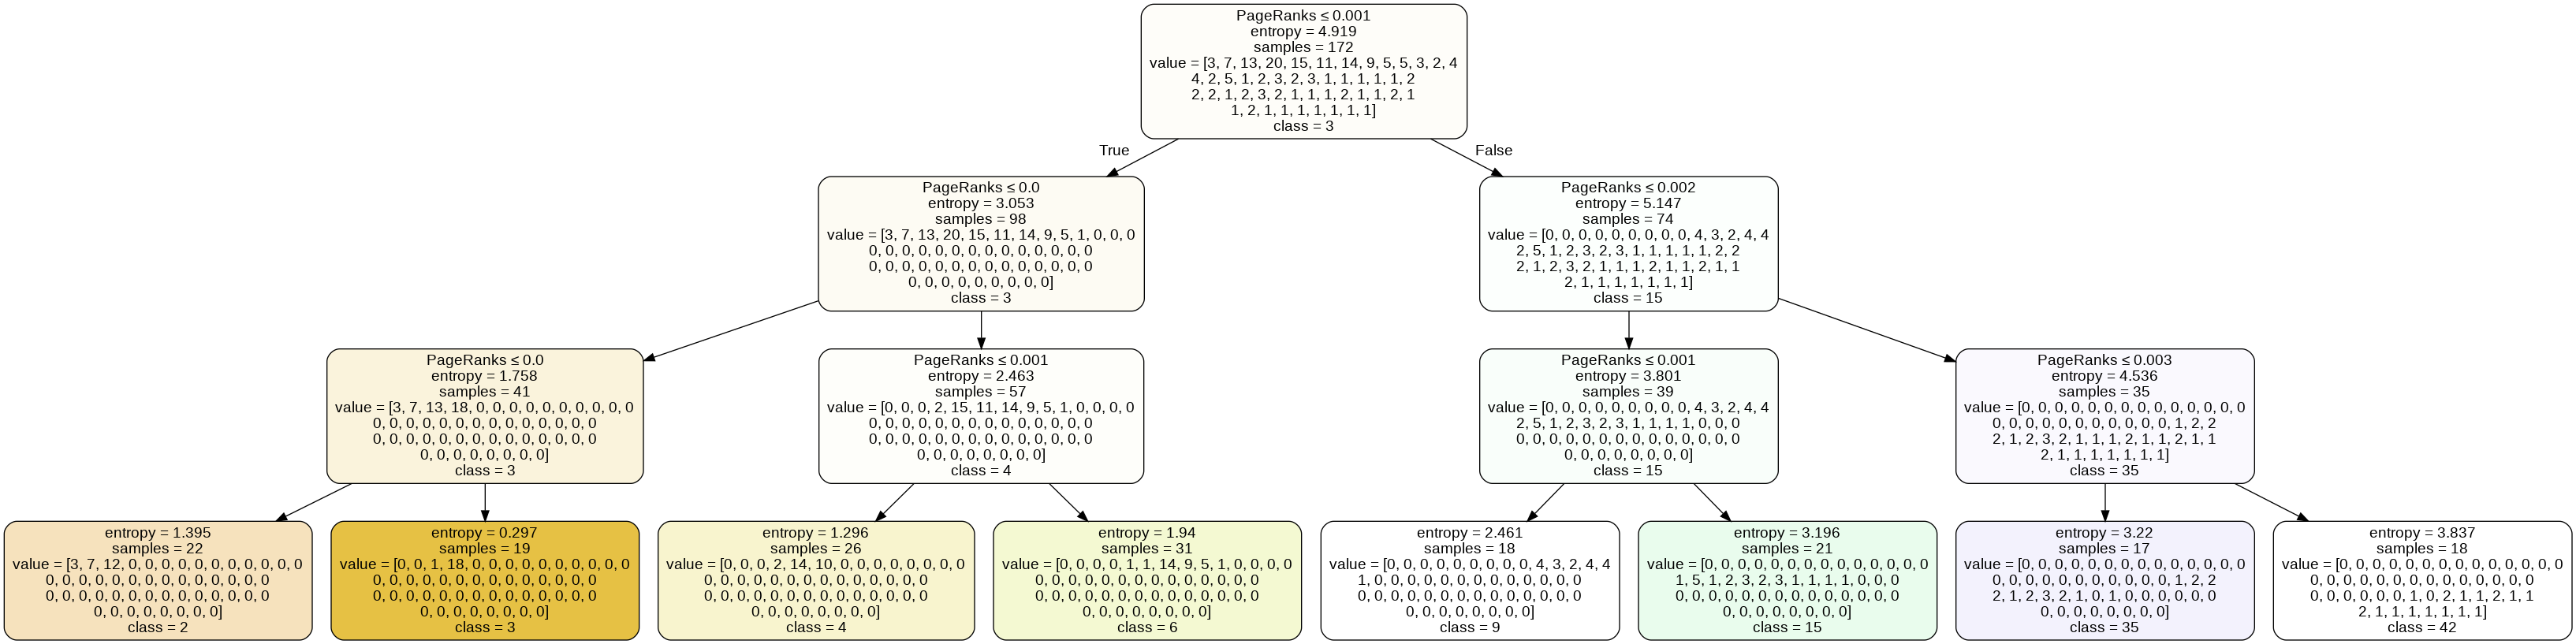

In [31]:
dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                                                                                  '18','19','20','21','22','23','24','26','27','28','30','31','33','35','36','38',
                                                                                  '39','40','42','43','44','47','50','51','55','56','63','77','79','80','83','85',
                                                                                 '92','98','132','159','165','171','222','327','331'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('journals_maxdepth' + str(max_depth) + '.png')
Image(graph.create_png())

In [32]:
max_depth = 12
#creating classifer object, setting maximum depth
simpler_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

simpler_classifier = simpler_classifier.fit(X_train,y_train) #training 

y_pred = simpler_classifier.predict(X_test) #predicting

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.32558139534883723


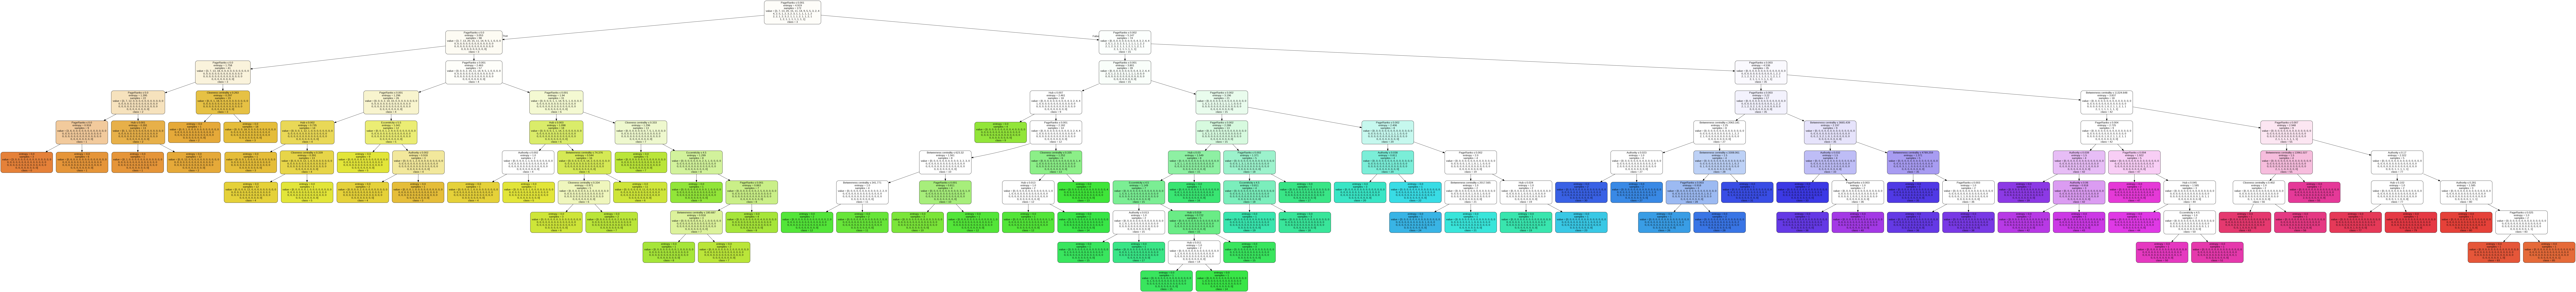

In [33]:
dot_data = StringIO()
export_graphviz(simpler_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17',
                                                                                  '18','19','20','21','22','23','24','26','27','28','30','31','33','35','36','38',
                                                                                  '39','40','42','43','44','47','50','51','55','56','63','77','79','80','83','85',
                                                                                 '92','98','132','159','165','171','222','327','331'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('journals_maxdepth' + str(max_depth) + '.png')
Image(graph.create_png())